In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# label

In [12]:
labels = {'0':'file', '1':'network', '2':'service', '3':'database', '4':'communication', '5':'memory', '6':'driver', 
    '7':'system', '8':'application', '9':'io', '10':'others', '11':'security', '12':'disk', '13':'processor'}

fault_label = {'0':'file', '1':'network', '2':'service', '3':'database','5':'memory', 
               '10':'others', '11':'security', '12':'disk', '13':'processor'}

# load data

In [3]:
train_X, test_X = [],[]
train_y, test_y = [],[]

print("loading data...")

try:
    with open("data_msg_type/semantic_train_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            train_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_train_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            train_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()
    
try:
    with open("data_msg_type/semantic_test_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            test_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_test_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            test_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()

print("Dataset loaded.")

loading data...
Dataset loaded.


# convert data

In [4]:
X_train = np.array(train_X) #change to matrix
y_train = np.array(train_y) #change to matrix
X_test = np.array(test_X) #change to matrix
y_test = np.array(test_y) #change to matrix

# random forest train

In [5]:
print("---------------Random Forest---------------")
n_estimators_list = range(1, 13) #try from one to 12 estimators.
result_random_forests = [] #to be used later for comparing rf with different estimators.
max_score_rf = float("-inf") #just in case we get NaN
best_param_rf = None

for trees in n_estimators_list:
    print("Testing %d trees" % trees)
    rf_clf = RandomForestClassifier(
        n_estimators=trees, max_depth=None, min_samples_split=2, random_state=0)
    scores = cross_validation.cross_val_score(
        rf_clf, X_train, y_train, scoring="accuracy", cv=14)
    result_random_forests.append(scores.mean())
    if scores.mean() > max_score_rf:
        max_score_rf = scores.mean()
        best_param_rf = {"n_estimators": trees}

---------------Random Forest---------------
Testing 1 trees


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=14.
  % (min_labels, self.n_folds)), Warning)


Testing 2 trees
Testing 3 trees
Testing 4 trees
Testing 5 trees
Testing 6 trees
Testing 7 trees
Testing 8 trees
Testing 9 trees
Testing 10 trees
Testing 11 trees
Testing 12 trees


# test and predict

In [6]:
rf_clf = RandomForestClassifier(n_estimators=best_param_rf.get("n_estimators"), 
         max_depth=None, min_samples_split=2, random_state=0).fit(X_train, y_train)

rf_clf_test_score = rf_clf.score(X_test, y_test)

# save trained model for future use.
#joblib.dump(rf_clf,'data/rf_clf.pkl', compress=9)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    # each xval is a set of features la one sample.
    # predict class for each row.. each i is a row.
    predicted = rf_clf.predict(classinrow)
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1
print()
print("Number of trees in forest: ", len(n_estimators_list))
print("Results: ", result_random_forests)
print("Best accuracy: ", max_score_rf)
print("Best parameter: ", best_param_rf)
print("Test set accuracy: ", rf_clf_test_score)

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)

()
('Number of trees in forest: ', 12)
('Results: ', [0.98459289773247227, 0.98554465778922007, 0.98738160934569219, 0.98770637632818425, 0.98778135383874743, 0.98785635104301917, 0.98540523943974467, 0.98554286005966407, 0.98454345935319332, 0.98583028483496127, 0.98486840569497613, 0.98496838882645943])
('Best accuracy: ', 0.98785635104301917)
('Best parameter: ', {'n_estimators': 6})
('Test set accuracy: ', 0.9899)
('Total cases: ', 20000)
('Correct Prediction: ', 19798)
('Correct prediction rate: ', 0.9899)


# plot

             precision    recall  f1-score   support

    network       0.98      0.90      0.93       473
       file       0.94      0.96      0.95       911
   database       1.00      1.00      1.00       213
    service       1.00      1.00      1.00         2
     memory       0.99      0.99      0.99      2891
     others       0.79      0.96      0.87       348
   security       1.00      1.00      1.00     14495
       disk       0.95      0.86      0.90       535
  processor       1.00      1.00      1.00       132

avg / total       0.99      0.99      0.99     20000

[[  424    15     0     0     1    24     0     9     0]
 [    6   875     0     0     3    19     1     7     0]
 [    0     0   213     0     0     0     0     0     0]
 [    0     0     0     2     0     0     0     0     0]
 [    2     0     0     0  2872    10     0     7     0]
 [    1     9     0     0     2   333     0     3     0]
 [    0     6     0     0     0     3 14486     0     0]
 [    1    26  

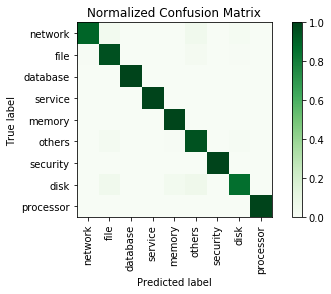

In [11]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

# show a normalized matrix as a separate figure.
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)